
## Step 1: Imports and Data Loading
# In this step, we import the necessary libraries and load the dataset.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the window size
window_size = 5

# Load dataset
data = pd.read_csv('data.csv', parse_dates=['Date'], index_col='Date')

# Convert 'Page.Loads' from string to integer
data['Page.Loads'] = data['Page.Loads'].str.replace(',', '').astype(int)

# Drop unnecessary columns
columns_to_drop = ["Row", "Day", "Day.Of.Week", "Unique.Visits", "Returning.Visits", "First.Time.Visits"]
data.drop(columns=columns_to_drop, inplace=True)


## Step 2: Data Normalization and Sequence Creation
# Here, we normalize the data and define functions to create sequences for the LSTM model.


In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))

# Function to create sequences
def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        sequence = data[i:(i + window_size)]
        label = data[i + window_size]
        X.append(sequence)
        y.append(label)
    return np.array(X), np.array(y)

# Function to prepare data
def prepare_data(data, start_date, end_date, window_size, scaler):
    data_filtered = data.loc[start_date:end_date, 'Page.Loads'].values.reshape(-1, 1)
    data_normalized = scaler.transform(data_filtered)
    X, y = create_sequences(data_normalized, window_size)
    X = X.reshape((X.shape[0], window_size, 1))
    return X, y

## Step 3: Model Definition
# We define the LSTM model architecture.

In [28]:
# Function to create the model
def create_model(window_size):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(window_size, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


## Step 4: Prediction and Plotting
# This part contains the function to plot the predictions and actual values, providing a visual comparison.


In [29]:
def plot_predictions(test, y_test, predicted_test, start_date, end_date, window_size, date_time):
    test_dates = test[start_date:end_date].index  # Adjusting the test_dates to match y_test and predicted_test
    uncertainty = 0.10 * predicted_test.flatten()
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(test_dates, y_test, color='red', label='Actual')
    ax.plot(test_dates, predicted_test, color='blue', label='Predicted')
    ax.fill_between(test_dates, 
                    (predicted_test.flatten() - uncertainty), 
                    (predicted_test.flatten() + uncertainty), 
                    color='blue', alpha=0.2)
    ax.set_title( 'LSTM Page Load Time Prediction with ' + date_time + ' of training data')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Loads')
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.set_xlim([pd.Timestamp(start_date) - pd.DateOffset(days=5), pd.Timestamp(end_date) + pd.DateOffset(days=5)])
    ax.set_ylim([0, max(max(y_test), max(predicted_test)) + 1000])
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(True)
    ax.legend()
    plt.tight_layout()
    plt.show()

## Step 5: Training and Evaluation Loop
# In this final step, we train the model using different training periods and evaluate its performance.


In [30]:
# Prepare training data for 2019
start_date = '2019-01-01'
end_date = '2019-12-26'

# Define testing period
testing_start_date = '2019-12-27'
testing_end_date = '2020-02-28'

scaler.fit(data.loc[start_date:end_date, ['Page.Loads']])
X_train, y_train = prepare_data(data, start_date, end_date, window_size, scaler)


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Train the model for 2019 data

In [31]:
%%time
model = create_model(window_size)
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2964
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1935 
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0890 
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0510 
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0546 
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0463 
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0443 
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0459 
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0439 
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0444 
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0464 
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0438 
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0395 
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0398 
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0412 
Epoch 16/50
12/1

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


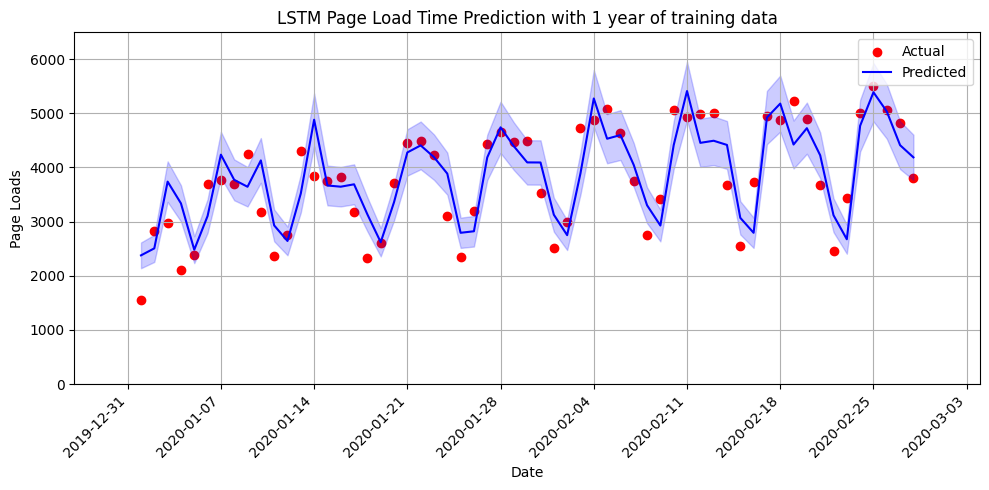

In [32]:
# Prepare testing data
X_test, y_test = prepare_data(data, testing_start_date, testing_end_date, window_size, scaler)

# Predict on test data
predicted_test = model.predict(X_test)
predicted_test = scaler.inverse_transform(predicted_test)

# Correctly get the actual values for the test period
y_test_actual = data.loc['2020-01-01':'2020-02-28', 'Page.Loads']
date_time = '1 year'
# Ensure 1-dimensional arrays for metric calculation
y_test_actual = y_test_actual.to_numpy().flatten()
predicted_test = predicted_test.flatten()[:len(y_test_actual)]  # Ensure the prediction length matches the actual data length

# Calculate metrics
mse = mean_squared_error(y_test_actual, predicted_test)
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test_actual, predicted_test)
mape = np.mean(np.abs((y_test_actual - predicted_test) / y_test_actual)) * 100

# Store results
results_2019 = (start_date, end_date, rmse, mae, mape)

# Plot predictions
plot_predictions(data, y_test_actual, predicted_test, '2020-01-01', '2020-02-28', window_size, date_time)

## Step 6: Training and Evaluation for 2018 Data
# We train the model using data from 2018 and measure the training time.


In [33]:
# Prepare training data for 2018
start_date = '2018-01-01'
end_date = '2019-12-26'
scaler.fit(data.loc[start_date:end_date, ['Page.Loads']])
X_train, y_train = prepare_data(data, start_date, end_date, window_size, scaler)

c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [34]:
%%time
# Train the model for 2018 data
model = create_model(window_size)
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2451   
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1029 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0436 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0399 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0380 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0380 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0369 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0347 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0343 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0342 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0287 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0283 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0224 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0217 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0176 
Epoch 16/50
2

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step

c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


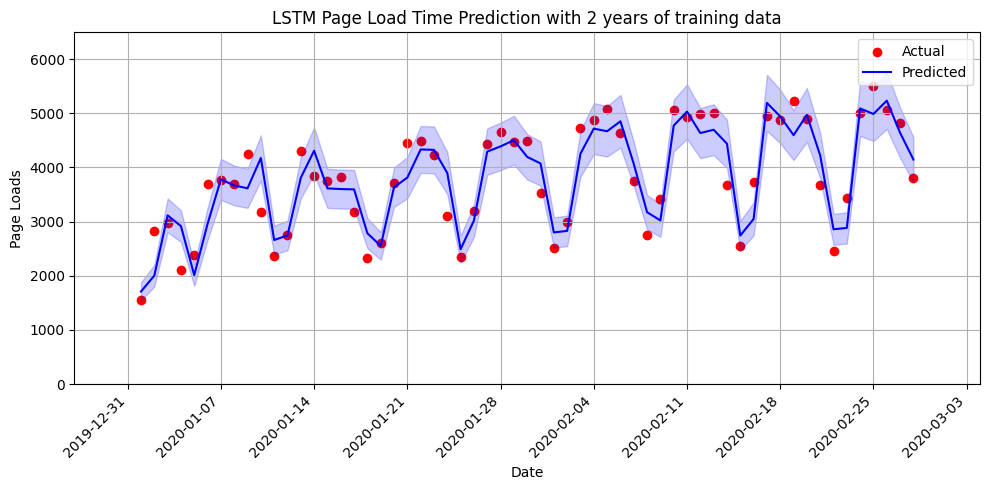

In [35]:
# Prepare testing data
X_test, y_test = prepare_data(data, testing_start_date, testing_end_date, window_size, scaler)

# Predict on test data
predicted_test = model.predict(X_test)
predicted_test = scaler.inverse_transform(predicted_test)

# Correctly get the actual values for the test period
y_test_actual = data.loc['2020-01-01':'2020-02-28', 'Page.Loads']
date_time = '2 years'
# Ensure 1-dimensional arrays for metric calculation
y_test_actual = y_test_actual.to_numpy().flatten()
predicted_test = predicted_test.flatten()[:len(y_test_actual)]  # Ensure the prediction length matches the actual data length

# Calculate metrics
mse = mean_squared_error(y_test_actual, predicted_test)
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test_actual, predicted_test)
mape = np.mean(np.abs((y_test_actual - predicted_test) / y_test_actual)) * 100

# Store results
results_2018 = (start_date, end_date, rmse, mae, mape)

# Plot predictions
plot_predictions(data, y_test_actual, predicted_test, '2020-01-01', '2020-02-28', window_size, date_time)

## Step 7: Training and Evaluation for 2017 Data
# We train the model using data from 2017 and measure the training time.


In [36]:
# Prepare training data for 2017
start_date = '2017-01-01'
end_date = '2019-12-26'
scaler.fit(data.loc[start_date:end_date, ['Page.Loads']])
X_train, y_train = prepare_data(data, start_date, end_date, window_size, scaler)

c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [37]:
%%time
# Train the model for 2017 data
model = create_model(window_size)
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1200
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0315 
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0297 
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0305 
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0295 
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0276 
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0274 
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0246 
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0210 
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0178 
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0139 
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0119 
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0130 
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0109 
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0118 
Epoch 16/50
34/3

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


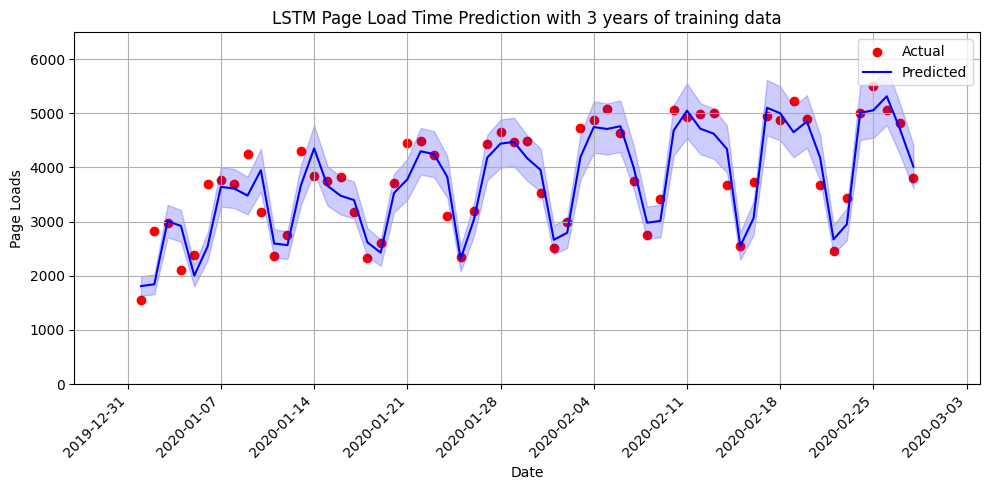

In [38]:
# Prepare testing data
X_test, y_test = prepare_data(data, testing_start_date, testing_end_date, window_size, scaler)

# Predict on test data
predicted_test = model.predict(X_test)
predicted_test = scaler.inverse_transform(predicted_test)

# Correctly get the actual values for the test period
y_test_actual = data.loc['2020-01-01':'2020-02-28', 'Page.Loads']
date_time = '3 years'
# Ensure 1-dimensional arrays for metric calculation
y_test_actual = y_test_actual.to_numpy().flatten()
predicted_test = predicted_test.flatten()[:len(y_test_actual)]  # Ensure the prediction length matches the actual data length

# Calculate metrics
mse = mean_squared_error(y_test_actual, predicted_test)
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test_actual, predicted_test)
mape = np.mean(np.abs((y_test_actual - predicted_test) / y_test_actual)) * 100

# Store results
results_2017 = (start_date, end_date, rmse, mae, mape)

# Plot predictions
plot_predictions(data, y_test_actual, predicted_test, '2020-01-01', '2020-02-28', window_size, date_time)

## Step 8: Training and Evaluation for 2016 Data
# We train the model using data from 2016 and measure the training time.


In [39]:
# Prepare training data for 2016
start_date = '2016-01-01'
end_date = '2019-12-26'
scaler.fit(data.loc[start_date:end_date, ['Page.Loads']])
X_train, y_train = prepare_data(data, start_date, end_date, window_size, scaler)


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [40]:
%%time
# Train the model for 2016 data
model = create_model(window_size)
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1537   
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0338 
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0321
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0302 
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0296 
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0262 
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0229
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0177
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0131
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0121
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0122
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0112
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0111
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0105 
Epoch 16/50
46/46 ━━━━

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step

c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


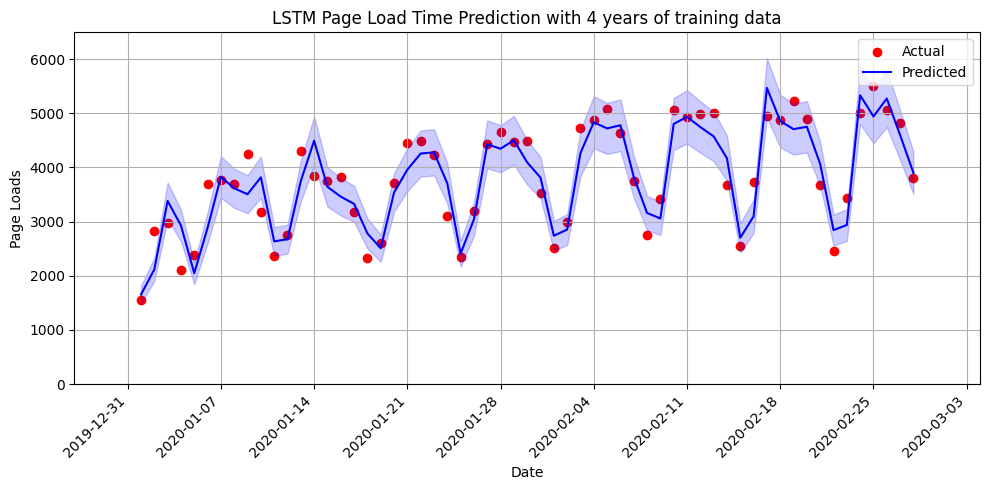

In [41]:
# Prepare testing data
X_test, y_test = prepare_data(data, testing_start_date, testing_end_date, window_size, scaler)

# Predict on test data
predicted_test = model.predict(X_test)
predicted_test = scaler.inverse_transform(predicted_test)

# Correctly get the actual values for the test period
y_test_actual = data.loc['2020-01-01':'2020-02-28', 'Page.Loads']
date_time = '4 years'
# Ensure 1-dimensional arrays for metric calculation
y_test_actual = y_test_actual.to_numpy().flatten()
predicted_test = predicted_test.flatten()[:len(y_test_actual)]  # Ensure the prediction length matches the actual data length

# Calculate metrics
mse = mean_squared_error(y_test_actual, predicted_test)
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test_actual, predicted_test)
mape = np.mean(np.abs((y_test_actual - predicted_test) / y_test_actual)) * 100

# Store results
results_2016 = (start_date, end_date, rmse, mae, mape)

# Plot predictions
plot_predictions(data, y_test_actual, predicted_test, '2020-01-01', '2020-02-28', window_size, date_time)

## Step 9: Display Results
# Finally, we display the results for all training periods.

In [42]:
# Print results
for result in [results_2016, results_2017, results_2018, results_2019]:
    print(f"Training period: {result[0]} to {result[1]}")
    print(f"  RMSE: {result[2]}")
    print(f"  MAE: {result[3]}")
    print(f"  MAPE: {result[4]}")
    print("\n" + "-"*50 + "\n")

Training period: 2016-01-01 to 2019-12-26
  RMSE: 383.3539615337799
  MAE: 314.18037233514303
  MAPE: 8.951509288499171

--------------------------------------------------

Training period: 2017-01-01 to 2019-12-26
  RMSE: 415.1306327734634
  MAE: 326.4868039923199
  MAPE: 9.323944306477342

--------------------------------------------------

Training period: 2018-01-01 to 2019-12-26
  RMSE: 414.4136039554718
  MAE: 338.49990275754766
  MAPE: 9.776089199483954

--------------------------------------------------

Training period: 2019-01-01 to 2019-12-26
  RMSE: 535.7801703291666
  MAE: 447.8916057004767
  MAPE: 13.554573450090404

--------------------------------------------------

